# Logistic Regression from a Neural Network Point of View 

(Starter Code)

## **1 - Imports**

In [1]:
import numpy as np                  # Scientific computing
import matplotlib.pyplot as plt     # plot graphs
import matplotlib.lines as mlines
import sklearn.datasets
import h5py                         # work with dataset stored in H5 files
import scipy                        # use your own pictures
from PIL import Image               # use your own pictures
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function

%matplotlib inline

## **2 - `sklearn` Dataset & Preprocessing**

Input, Output: X1_, Y1_

Number of features: n = 2

Number of instances/samples: m = 100

In [2]:
# Generating random dataset with sklearn

np.random.seed(7)
X1_raw, Y1_raw = sklearn.datasets.make_classification(n_samples = 100, n_features=2, 
                            n_redundant=0, n_informative=1,
                            n_clusters_per_class=1)


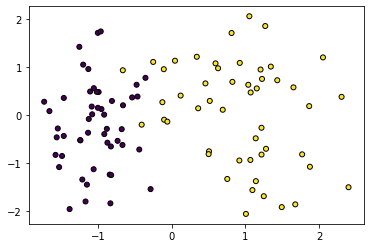

In [3]:
# Visualize the data:
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')
plt.show()

In [4]:
# Check shapes
print(X1_raw.shape)
print(Y1_raw.shape)

# Example of a point
#index = 1
#print("Point #" + str(index) + " : " + str(X1_raw[index,:]))
#print("Class #" + str(index) + " : " + str(Y1_raw[index]))

(100, 2)
(100,)


In [5]:
# We need one Datapoint per column 
# X1_raw has shape (100,2), one row per instance
# transpose to (2, 100), one column per instance
X1 = np.transpose(X1_raw)

# reshape Y1 from (100,) to (1, 100)
Y1 = Y1_raw.reshape(1, Y1_raw.shape[0])

# check shapes
print(X1.shape)
print(Y1.shape)

### Q : What is the difference between the shapes (100,) and (1,100) ?

(2, 100)
(1, 100)


In [6]:
# Extend every input by x_0 = 1 and check shape
X = np.vstack((np.ones((1,100)), X1))
Y = Y1
print(X.shape)
print(Y.shape)

(3, 100)
(1, 100)


## **3 - Using LogisticRegression of sklearn**



**The Forward Pass**
$$z = w^Tx \tag{1}$$
$$\hat{y} = a = sigmoid(z)\tag{2}$$ 


**The Loss**
$$\mathcal{L}(a, y) =  - y  \log(a) - (1-y)  \log(1-a)\tag{3}$$


**The Cost is the average loss over all examples $x^{(i)} ... x^{(m)}$**
$$J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{4}$$


In [7]:
# LogisticRegression() method from sklearn
# --> You can use this result as a baseline and compare your own result againt it.

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X1_raw, Y1_raw)

# Note: "lbfgs" is not gradient descent. The call of the fit() function runs a
# different optimization algorithm to calculate the optimum solution.
# See: http://users.iems.northwestern.edu/~nocedal/lbfgsb.html

LogisticRegression(random_state=42)

In [13]:
# predicted probabilities of the model for all dataponts
y_proba = log_reg.predict_proba(X1_raw)
# predicted classes of the model for all datapoints
y_pred = log_reg.predict(X1_raw)

# compare predicted probilities and classes to the ground truth (true labels) 
# for the first five datapoints
print(y_proba[0:5])
print(y_pred[0:5])
print(Y1_raw[0:5])

# Q: the model classifies the 4th and 5th points both as "1";
# in which case the model is more sure about its prediction?

[[0.014604   0.985396  ]
 [0.95615098 0.04384902]
 [0.00255726 0.99744274]
 [0.39009708 0.60990292]
 [0.06970522 0.93029478]]
[1 0 1 1 1]
[1 0 1 1 1]


In [14]:
# the calculated "best" weights/parameters
w0 = log_reg.intercept_[0]
w1 = log_reg.coef_.T[0][0]
w2 = log_reg.coef_.T[1][0]
print("w0: " + str(w0))
print("w1: " + str(w1))
print("w2: " + str(w2))

w0: 0.7033715399069996
w1: 3.3104410780054243
w2: 0.5671786293839883


In [18]:
# the decision boundary (determine two points on the line)
xp = np.array((-2, 2.6))
yp = -(w0 + w1 * xp)/w2

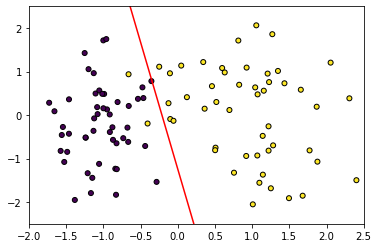

In [19]:
# plot decision boundaries
# Visualize the data:
colors=["y", "r", "g", "b", "c", "m"]
fig, ax = plt.subplots()
ax.scatter(X1_raw[:, 0], X1_raw[:, 1], marker='o', c=Y1_raw, s=25, edgecolor='k')
plt.axis([-2, 2.5, -2.5, 2.5])
plt.plot(xp, yp, "r-")
plt.show()

In [ ]:
# how good does the model fit the training data?
# training accuracy: what fraction of the training data is classified correctly?

acc = 1 - np.mean(np.abs(Y1_raw - y_pred))
print("training accuracy: " + str(acc))

training accuracy: 0.98


## **4 - Implement your functions**

Complete the function implementations below. Replace the "None" instances with your code.

### **Parameter Initialization**



In [20]:
def init_parameters(n):
  np.random.seed(2)
  # -- start of your code
  w = None 
  # -- end of your code

  assert(w.shape == (n+1,1))
  return (w)

### **One Forward Pass**
$A = \sigma(w^T X) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$

In [ ]:
def forward_pass(X, w):
  # Hint: use scipy.special.expit as sigmoid function
  # -- start of your code
  A = None
  # -- end of your code
  
  assert(A.shape == (1, X.shape[1]))
  return A

### **Calculating the Loss (Cross-Entropy Loss)**

$$\mathcal{L}(A,Y) = -Y\log(A)-(1-Y)\log(1-A)\tag{5}$$

In [ ]:
def calculate_loss(A,Y):

  # -- start of your code
  L = None
  # -- end of your code
  
  assert(L.shape == Y.shape)
  return L

### **Calculating the Cost**

Averaging over the Losses: 

$$J = \frac{1}{m} np.sum(L)\tag{6}$$


$$J(A,Y) = \frac{1}{m}np.sum(-Y\log(A)-(1-Y)\log(1-A))\tag{7}$$

In [ ]:
def calculate_cost(loss):

  # -- start of your code
  cost = None
  # -- end of your code
  
  assert(isinstance(cost, float) or isinstance(cost, int))
  cost = np.squeeze(cost)
  assert(cost.shape == ())

  return(cost)

### **Calculating the Gradients**

$$dw := \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{8}$$


In [ ]:
def calculate_gradients(X, Y, A):

  # -- start of your code
  dw = None
  # -- end of your code

  assert(dw.shape == (X.shape[0],1))
  return dw

### **One Optimization/Learning Step**

$$w = w - \alpha \ dw\tag{10}$$

In [21]:
def update_parameters(w, dw, learning_rate = 0.01):

  # -- start of your code
  w_new = None
  # -- end of your code

  assert(w_new.shape == w.shape)
  return w_new

## **4 - One training step**

Test your functions

In [ ]:
# dataset stored in X and Y
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints


In [ ]:
# init
w = init_parameters(n)
print(w)

In [ ]:
# forward pass
A = forward_pass(X, w)
print(A)

In [ ]:
# loss
loss = calculate_loss(A,Y)
print(loss)

In [ ]:
# cost
cost = calculate_cost(loss)
print(cost)

0.6931471805599453


In [ ]:
# calculate gradients
dw = calculate_gradients(X, Y, A)
print ("dw = " + str(dw))

In [ ]:
# update parameters

# Note: The size of the step is controlled by the learning_rate
learning_rate = 0.001

print("Parameters and Cost Before Update")
print("w = " + str(w))
print("Cost = " + str(cost))

w = update_parameters(w,dw, learning_rate)

print("\nParameters and Cost After Update")
print("w = " + str(w))

A = forward_pass(X, w)
loss = calculate_loss(A,Y)
cost = calculate_cost(loss)
print("Cost = " + str(cost))

## **5 - Gradient Descent**

Train a logistic regression model, i.e. optimize the parameters

In [ ]:
# dataset
n = X.shape[0] - 1  # number of features
m = X.shape[1]      # number of examples/datapoints

# init parameters, set hyperparameters
w = init_parameters(n)
learning_rate = 0.01
num_iterations = 2000
costs = []


for i in range(num_iterations):
  # -- start of your code
  A = None
  loss = None
  cost = None

  if i % 100 == 0:
    costs.append(cost)

  dw = None
  w = None
  # -- end of your code

  if print_cost and i%100 == 0:
    print ("Cost after iteration %i: %f" %(i, cost))

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [ ]:
# Evaluate your model - how many points are classified correctly?

# -- start of your code

accuracy = None

# -- end of your code

print("Train accuracy: {} %".format(accuracy))